Weight: [ 0.52804662 -0.008798  ], Bias: 1.1827839369908517, Error=2.8655678739817034
Weight: [ 0.52804662 -0.008798  ], Bias: 0.9827839369908516, Error=2.465567873981703
Weight: [ 0.52804662 -0.008798  ], Bias: 0.7827839369908517, Error=2.0655678739817036
Weight: [ 0.52804662 -0.008798  ], Bias: 0.5827839369908517, Error=1.6655678739817033
Weight: [0.42804662 0.091202  ], Bias: 0.48278393699085176, Error=1.4196285538711804
Weight: [ 0.32804662 -0.008798  ], Bias: 0.3827839369908518, Error=1.0020325576975195
Weight: [0.22804662 0.091202  ], Bias: 0.2827839369908518, Error=1.0196285538711805
Weight: [ 0.12804662 -0.008798  ], Bias: 0.1827839369908518, Error=0.6020325576975197
Weight: [0.02804662 0.091202  ], Bias: 0.08278393699085179, Error=0.6196285538711804
Weight: [-0.07195338 -0.008798  ], Bias: -0.017216063009148214, Error=0.2020325576975197
Weight: [-0.07195338 -0.008798  ], Bias: -0.017216063009148214, Error=0.6
Weight: [-0.07195338 -0.008798  ], Bias: -0.017216063009148214, Erro

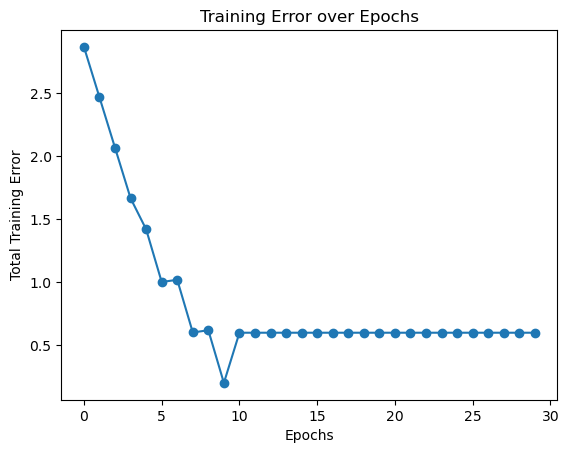


Testing the trained Perceptron:
(Input: [-1 -1], Output: -1), Predicted Output: 1
(Input: [-1  1], Output: 1), Predicted Output: 1
(Input: [ 1 -1], Output: 1), Predicted Output: -1
(Input: [1 1], Output: -1), Predicted Output: -1


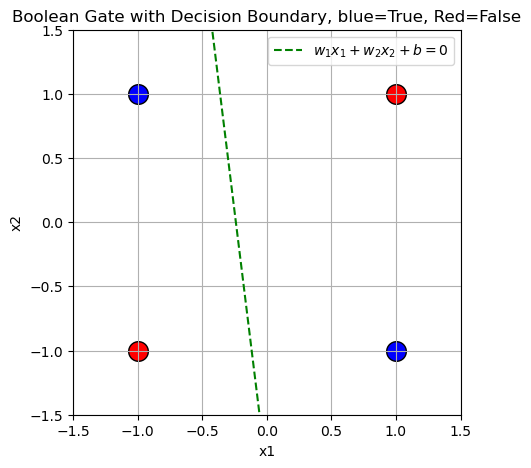

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define gate dataset

#X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])  # Inputs
#Y = np.array([1, 1, 1, -1])  # NAND Gate outputs

#X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])  # Inputs
#Y = np.array([-1, -1, -1, 1])  # AND Gate outputs

X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])  # Inputs
Y = np.array([-1, 1, 1, -1])  # XOR Gate outputs

#X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])  # Inputs
#Y = np.array([-1, 1, 1, 1])  # OR Gate outputs

# Initialize weights and bias
weights = np.random.randn(2)
bias = np.random.randn()
learning_rate = 0.1
epochs = 30

# Store loss values for plotting
loss_values = []

# Training loop
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        x_i = X[i]
        y_i = Y[i]

        # Compute activation
        y_pred = np.dot(weights, x_i) + bias
        y_pred = 1 if y_pred > 0 else -1  # Apply sgn function

        # Compute error
        #error = y_i - y_pred
        #update parameters only when (x_i,y_i) pair don't match with predicted values
        if y_i * y_pred < 0:
            error = - y_i * (np.dot(weights, x_i) + bias)
            weights += learning_rate * y_i * x_i
            bias += learning_rate * y_i
            total_error += error
        
        # Update weights and bias
        #weights += learning_rate * error * x_i
        #bias += learning_rate * error
        #weights += learning_rate * y_i * x_i
        #bias += learning_rate * y_i
        #total_error += error
        
    # Store total error for this epoch
    loss_values.append(total_error)
    print(f"Weight: {weights[:]}, Bias: {bias}, Error={total_error}")

# Plot the loss function
plt.plot(range(epochs), loss_values, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Total Training Error')
plt.title('Training Error over Epochs')
plt.show()

# Test the trained perceptron
def test_perceptron(X, weights, bias):
    for (x,y) in zip(X,Y):
        y_pred = np.dot(weights, x) + bias
        y_pred = 1 if y_pred > 0 else -1
        print(f"(Input: {x}, Output: {y}), Predicted Output: {y_pred}")

    #print("\nPredictions on OR gate inputs:")
    #for i, (input_val, pred, target) in enumerate(zip(X, predictions, y)):
        #print(f"Input {input_val} => Prediction: {pred}, Target: {target}")

print("\nTesting the trained Perceptron:")
test_perceptron(X, weights, bias)

# plot plane and decision boundary 

# Define colors: Red for 0, Blue for 1
colors = ['red' if y == -1 else 'blue' for y in Y]

# Plot OR Gate results
plt.figure(figsize=(5, 5))
for (x1, x2), color in zip(X, colors):
    plt.scatter(x1, x2, c=color, s=200, edgecolors='black')

# Parameters for the decision boundary line w1*x1 + w2*x2 + b = 0
#w = np.array([1, 1])  # Example weights (can be modified)
#b = -0.5  # Example bias (can be modified)

# Calculate the line from the equation
x1_values = np.linspace(-1.5, 1.5, 100)
x2_values = -(weights[0] * x1_values + bias) / weights[1]
   
# Plot the decision boundary line
plt.plot(x1_values, x2_values, label=r'$w_1 x_1 + w_2 x_2 + b = 0$', color='green', linestyle='--')

# Labels and Title
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Boolean Gate with Decision Boundary, blue=True, Red=False")

# Set axis limits
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Show the grid and plot
plt.grid(True)
plt.legend()
plt.show()
